In [1]:
import ephem
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

-66:31:36.1 176:43:59.4


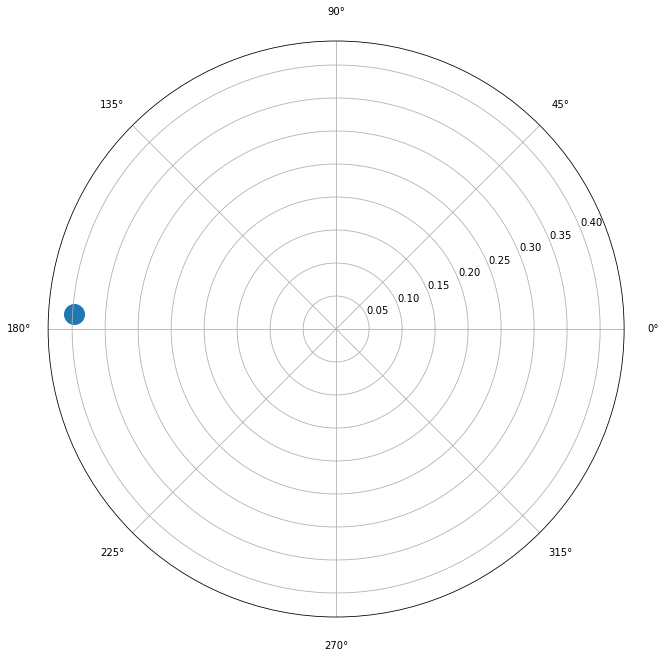

In [95]:
bogota = ephem.Observer()
bogota.lon, gatech.lat = '-74.0721', '4.7110'
bogota.date =  '2017/12/21 5:00:00'
m = ephem.Moon()
s = ephem.Sun()
s.compute(bogota)
print(s.alt, s.az)
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1, 0.1, 1.0, 1.0], polar=True)
theta = s.az
r = np.cos(s.alt)
plt.scatter(theta, r, s=400)

In [72]:
np.rad2deg(s.az)

310.53288404847223

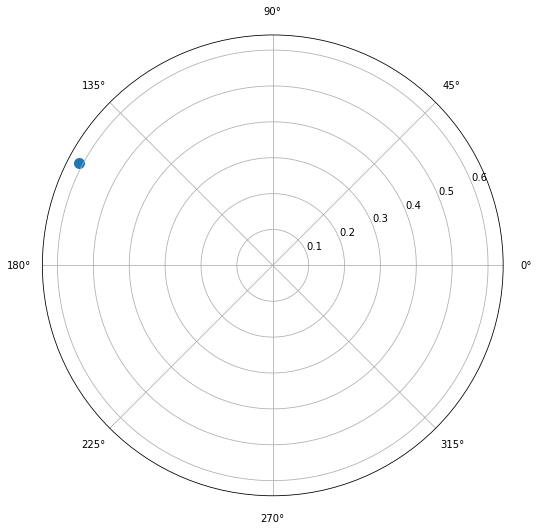